In [162]:
import pandas as pd
import requests
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yfin
import pandas_ta as ta
import datetime as dt

In [210]:
data = pd.read_csv("GBPUSD_M5_202301020000_202312292350.csv")
all_rows = []
for i, row in data.iterrows():
    new_row = str(row.values[0]).split("\t")
    new_row = new_row[:-2]
    new_row = (new_row[0] + " " + new_row[1], new_row[2:])
    all_rows.append(new_row)
    
all_dates = [val[0] for val in all_rows]
all_OHLCV = [val[1] for val in all_rows]
data = pd.DataFrame(data = all_OHLCV, index = all_dates, columns = ["Open", "High", "Low", "Close", "Volume"])
data = data.astype(float)
data.index = pd.to_datetime(data.index)

data["VWAP"] = ta.vwap(data.High, data.Low, data.Close, data.Volume)
data["RSI"] = ta.rsi(data.Close, length = 14)
bbands = ta.bbands(data.Close, length = 14, std = 2)
data = data.join(bbands)
data = data.dropna()

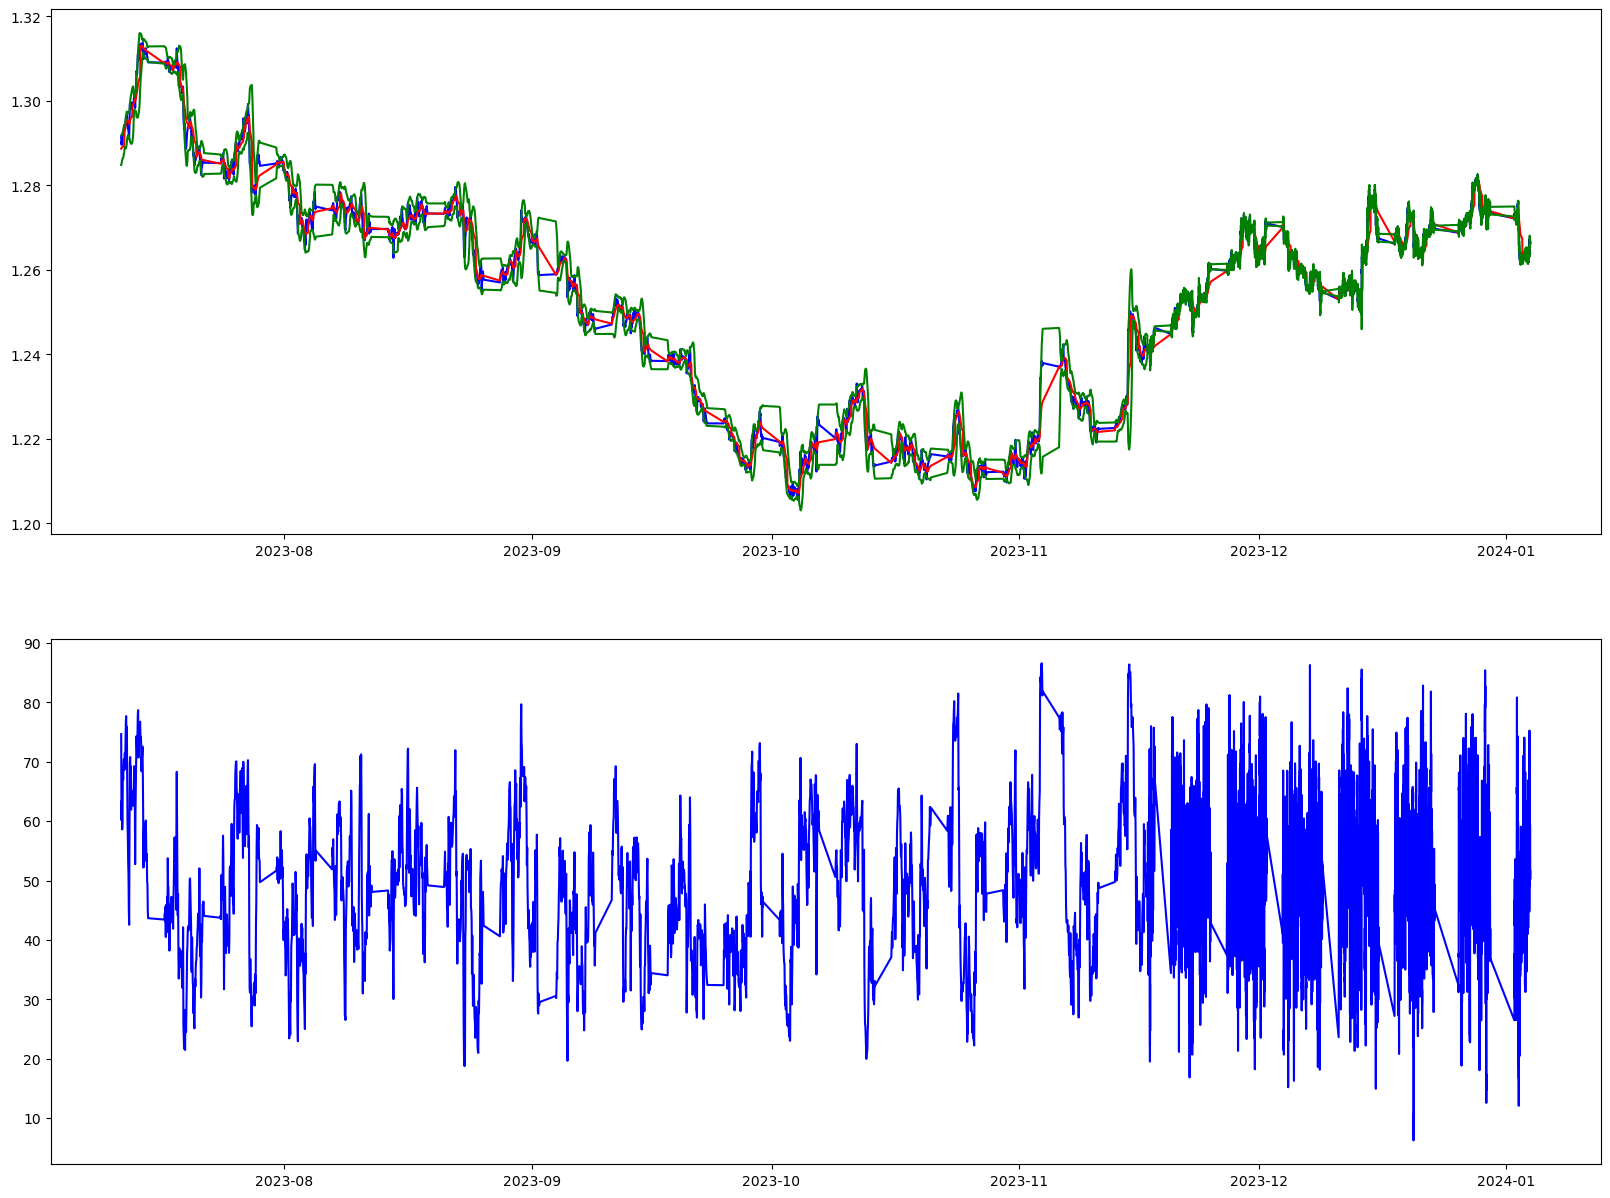

In [205]:
fig, axs = plt.subplots(2, 1, figsize = (20, 15))

axs[0].plot(data["Close"], color = "b")
axs[0].plot(data["VWAP"], color = "r")
axs[0].plot(data["BBL_14_2.0"], color = "g")
axs[0].plot(data["BBU_14_2.0"], color = "g")

axs[1].plot(data["RSI"], color = "b")
plt.show()

In [206]:
VWAPsignal = [0]*len(data)
backcandles = 15

for row in range(backcandles, len(data)):
    up_trend = 1
    dwn_trend = 1
    for i in range(row-backcandles, row+1):
        if max(data.Open[i], data.Close[i]) >= data.VWAP[i]:
            dwn_trend = 0
        if min(data.Open[i], data.Close[i]) <= data.VWAP[i]:
            up_trend = 0
    if up_trend == 1 and dwn_trend == 1:
        VWAPsignal[row] = 3
    elif up_trend == 1:
        VWAPsignal[row] = 2
    elif dwn_trend == 1:
        VWAPsignal[row] = 1
        
data["VWAPsignal"] = VWAPsignal
data = data[backcandles:]
data

C:\Users\edgar\AppData\Local\Temp\ipykernel_21276\2109618729.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if max(data.Open[i], data.Close[i]) >= data.VWAP[i]:
C:\Users\edgar\AppData\Local\Temp\ipykernel_21276\2109618729.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if min(data.Open[i], data.Close[i]) <= data.VWAP[i]:


,Open,High,Low,Close,Volume,VWAP,RSI,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0,VWAPsignal
2023-07-12 05:00:00,1.29601,1.29695,1.29558,1.29636,5533.0,1.295248,77.697423,1.289043,1.292891,1.296740,0.595372,0.950610,0
2023-07-12 06:00:00,1.29637,1.29638,1.29561,1.29590,3958.0,1.295385,73.856986,1.289405,1.293283,1.297161,0.599757,0.837410,0
2023-07-12 07:00:00,1.29591,1.29669,1.29563,1.29664,2785.0,1.295496,75.919068,1.290093,1.293779,1.297465,0.569817,0.888042,0
2023-07-12 08:00:00,1.29665,1.29669,1.29517,1.29551,3939.0,1.295538,67.202116,1.291061,1.294174,1.297288,0.481179,0.714494,0
2023-07-12 09:00:00,1.29552,1.29666,1.29421,1.29440,4445.0,1.295475,59.923629,1.291400,1.294327,1.297254,0.452322,0.512445,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03 23:30:00,1.26665,1.26665,1.26633,1.26651,110.0,1.263866,55.503057,1.265979,1.266417,1.266855,0.069204,0.605951,2
2024-01-03 23:35:00,1.26651,1.26668,1.26644,1.26667,71.0,1.263868,57.861735,1.266064,1.266463,1.266862,0.062992,0.759652,2
2024-01-03 23:40:00,1.26669,1.26679,1.26654,1.26661,136.0,1.263872,56.649053,1.266069,1.266475,1.266881,0.064061,0.666397,2
2024-01-03 23:45:00,1.26660,1.26660,1.26616,1.26627,162.0,1.263877,50.225278,1.266065,1.266474,1.266882,0.064492,0.250760,2


In [213]:
df = data
df['Max_Open_Close'] = np.maximum(df['Open'], df['Close'])
df['Min_Open_Close'] = np.minimum(df['Open'], df['Close'])
df['upt'] = 1
df['dnt'] = 1
df.loc[(df['Max_Open_Close'] >= df['VWAP']), 'dnt'] = 0
df.loc[(df['Min_Open_Close'] <= df['VWAP']), 'upt'] = 0
df['sig_dnt'] = df['dnt'].rolling(backcandles + 1, min_periods=1).min()
df['sig_upt'] = df['upt'].rolling(backcandles + 1, min_periods=1).min()
df['VWAPSignal'] = 0
df.loc[(df['sig_upt'] == 1) & (df['sig_dnt'] == 1), 'VWAPSignal'] = 3
df.loc[(df['sig_upt'] == 1) & (df['sig_dnt'] == 0), 'VWAPSignal'] = 2
df.loc[(df['sig_upt'] == 0) & (df['sig_dnt'] == 1), 'VWAPSignal'] = 1

,Open,High,Low,Close,Volume,VWAP,RSI,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0,Max_Open_Close,Min_Open_Close,upt,dnt,sig_dnt,sig_upt,VWAPSignal
2023-07-11 14:00:00,1.29123,1.29188,1.29016,1.29144,4537.0,1.288672,74.658671,1.284802,1.288305,1.291808,0.543848,0.947446,1.29144,1.29123,1,0,0.0,1.0,2
2023-07-11 15:00:00,1.29145,1.29164,1.28867,1.28963,6135.0,1.288802,60.159741,1.285154,1.288539,1.291925,0.525500,0.661080,1.29145,1.28963,1,0,0.0,1.0,2
2023-07-11 16:00:00,1.28960,1.29089,1.28861,1.29042,7386.0,1.288928,63.492268,1.285532,1.288826,1.292120,0.511143,0.742008,1.29042,1.28960,1,0,0.0,1.0,2
2023-07-11 17:00:00,1.29042,1.29123,1.28914,1.28969,5409.0,1.289007,58.613298,1.285893,1.289026,1.292160,0.486215,0.605876,1.29042,1.28969,1,0,0.0,1.0,2
2023-07-11 18:00:00,1.28967,1.29003,1.28881,1.28998,4606.0,1.289042,59.930584,1.286297,1.289242,1.292187,0.456879,0.625267,1.28998,1.28967,1,0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03 23:30:00,1.26665,1.26665,1.26633,1.26651,110.0,1.263866,55.503057,1.265979,1.266417,1.266855,0.069204,0.605951,1.26665,1.26651,1,0,0.0,1.0,2
2024-01-03 23:35:00,1.26651,1.26668,1.26644,1.26667,71.0,1.263868,57.861735,1.266064,1.266463,1.266862,0.062992,0.759652,1.26667,1.26651,1,0,0.0,1.0,2
2024-01-03 23:40:00,1.26669,1.26679,1.26654,1.26661,136.0,1.263872,56.649053,1.266069,1.266475,1.266881,0.064061,0.666397,1.26669,1.26661,1,0,0.0,1.0,2
2024-01-03 23:45:00,1.26660,1.26660,1.26616,1.26627,162.0,1.263877,50.225278,1.266065,1.266474,1.266882,0.064492,0.250760,1.26660,1.26627,1,0,0.0,1.0,2


In [216]:
def Signal(data):
    signal = [0] * len(data)
    for i in range(len(data)):
        if (data.VWAPSignal[i] == 2 and
            data.Close[i] <= data["BBL_14_2.0"][i] and
            data.RSI[i] < 45):
            signal[i] = 2
        if (data.VWAPSignal[i] == 1 and
            data.Close[i] >= data["BBU_14_2.0"][i] and
            data.RSI[i] > 55):
            signal[i] = 1
        
    data["Signal"] = signal
    
    return data

data = Signal(df)
            

C:\Users\edgar\AppData\Local\Temp\ipykernel_21276\182924813.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data.VWAPSignal[i] == 2 and
C:\Users\edgar\AppData\Local\Temp\ipykernel_21276\182924813.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.Close[i] <= data["BBL_14_2.0"][i] and
C:\Users\edgar\AppData\Local\Temp\ipykernel_21276\182924813.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data.VWAPSignal[i] ==

In [217]:
data["ATR"] = ta.atr(data.High, data.Low, data.Close, length = 7)

In [218]:
from backtesting import Strategy, Backtest

class MyVWAPScalp(Strategy):
    
    size = 0.1
    tp_ratio = 1.5
    sl_ratio = 1.2
    
    def init(self):
        super().init()
        
    def next(self):
        super().next()
        sl_dist = self.sl_ratio * self.data.ATR[-1]
        
        if len(self.trades) > 0:
            if self.trades[-1].is_long and self.data.RSI[-1] >= 90:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1] <= 10:
                self.trades[-1].close()
        elif self.data.Signal[-1] == 2 and len(self.trades) == 0:
            sl = self.data.Close[-1] - sl_dist
            tp =self.data.Close[-1] + (self.tp_ratio * sl_dist)
            self.buy(sl=sl, tp=tp, size = self.size)
        elif self.data.Signal[-1] == 1 and len(self.trades) == 0:
            sl = self.data.Close[-1] + sl_dist
            tp =self.data.Close[-1] - (self.tp_ratio * sl_dist)
            self.sell(sl=sl, tp=tp, size = self.size)
            
bt = Backtest(data, MyVWAPScalp, cash=20000)
stat = bt.run()
stat

Start                     2023-07-11 14:00:00
End                       2024-01-03 23:50:00
Duration                    176 days 09:50:00
Exposure Time [%]                    5.484638
Equity Final [$]                 20012.685215
Equity Peak [$]                  20018.211113
Return [%]                           0.063426
Buy & Hold Return [%]               -1.942793
Return (Ann.) [%]                    0.127908
Volatility (Ann.) [%]                0.078798
Sharpe Ratio                         1.623241
Sortino Ratio                         2.76174
Calmar Ratio                         3.716682
Max. Drawdown [%]                   -0.034415
Avg. Drawdown [%]                   -0.009761
Max. Drawdown Duration        9 days 13:05:00
Avg. Drawdown Duration        1 days 15:23:00
# Trades                                   93
Win Rate [%]                        40.860215
Best Trade [%]                        0.21749
Worst Trade [%]                     -0.092187
Avg. Trade [%]                    